In [30]:
import random
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# INITIALIZING HYPERPARAMETERES

In [2]:
ALPHA = 0.0001
NUM_EPOCHS = 10000
BATCH_SIZE = 15

In [3]:
INPUT_DIM = 30
OUT_DIM = 2
H_DIM = 64

# ACTIVATION FUNCTIONS AND THEIR DERIVATIVES

In [4]:
def relu(t):
    return np.maximum(t, 0)


def relu_deriv(t):
    return (t >= 0).astype(float)

def sigmoid(t):
    return 1/(1+np.exp(-t))

def sigmoid_deriv(t):
    return sigmoid(t)*(1-sigmoid(t))

def softmax(t):
    out = np.exp(t)
    return out / np.sum(out)

def softmax_batch(t):
    out = np.exp(t)
    return out / np.sum(out, axis=1, keepdims=True)


def sigmoid_batch(t):
    return 1/(1+np.exp(-t))

def tanh(x):
    return np.tanh(x);

def grad_tanh(x):
    return 1 - np.tanh(x) ** 2;


# LOSS FUNCTIONS

In [5]:
def sparse_cross_entropy(z, y):
              return -np.log(z[0, y])

def sparse_cross_entropy_batch(z, y):
              return -np.log(np.array([z[j, y[j]] for j in range(len(y))]))
    
def mse(z, y):
    return np.mean(np.power(z[0, y], 2));


In [6]:
#ONE HOT ENCODING Y 
def one_hot(y, num_classes):
    y_full = np.zeros((1, num_classes))
    y_full[0, y] = 1
    return y_full

def one_hot_batch(y, num_classes):
    y_full = np.zeros((len(y), num_classes))
    for j, yj in enumerate(y):
        y_full[j, yj] = 1
    return y_full


# INITIALIZING DATASET

In [7]:
dataset = pd.read_csv('wdbc.data',header = None)
dataset.head(5)
dataset.info()
#Feature and Label selection to set x and y
x = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 1].values

labelencoder_x_1 = LabelEncoder()
y = labelencoder_x_1.fit_transform(y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [8]:
dataset = [(x[i][None, ...], y[i]) for i in range(len(x))]

In [9]:
W1 = np.random.rand(INPUT_DIM, H_DIM)
b1 = np.random.rand(1, H_DIM)
W2 = np.random.rand(H_DIM, OUT_DIM)
b2 = np.random.rand(1, OUT_DIM)

In [10]:
W1 = (W1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
b1 = (b1 - 0.5) * 2 * np.sqrt(1/INPUT_DIM)
W2 = (W2 - 0.5) * 2 * np.sqrt(1/H_DIM)
b2 = (b2 - 0.5) * 2 * np.sqrt(1/H_DIM)

In [11]:

loss_arr = []
# teaching model
for ep in range(NUM_EPOCHS):
   
    for i in range(len(dataset) // BATCH_SIZE):

        batch_x, batch_y = zip(*dataset[i*BATCH_SIZE : i*BATCH_SIZE+BATCH_SIZE])
        x = np.concatenate(batch_x, axis=0)
        y = np.array(batch_y)

        # Forward
        t1 = x @ W1 + b1
        h1 = sigmoid(t1)
        t2 = h1 @ W2 + b2
        z = sigmoid_batch(t2)
        E = np.sum(sparse_cross_entropy_batch(z, y))

        # Backward
        y_full = one_hot_batch(y, OUT_DIM)
        dE_dt2 = z - y_full
        dE_dW2 = h1.T @ dE_dt2
        dE_db2 = np.sum(dE_dt2, axis=0, keepdims=True)
        dE_dh1 = dE_dt2 @ W2.T
        dE_dt1 = dE_dh1 * sigmoid_deriv(t1)
        dE_dW1 = x.T @ dE_dt1
        dE_db1 = np.sum(dE_dt1, axis=0, keepdims=True)

        # Update parametres
        W1 = W1 - ALPHA * dE_dW1
        b1 = b1 - ALPHA * dE_db1
        W2 = W2 - ALPHA * dE_dW2
        b2 = b2 - ALPHA * dE_db2

        loss_arr.append(E)

/var/folders/8k/r1h0zb110_n__jrrs7cy28t80000gn/T/ipykernel_15306/2995731475.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-t))


In [12]:
def predict(x):
    t1 = x @ W1 + b1
    h1 = relu(t1)
    t2 = h1 @ W2 + b2
    z = softmax_batch(t2)
    return z

# Accuracy 

In [13]:
def calc_accuracy():
    correct = 0
    for x, y in dataset:
        z = predict(x)
        y_pred = np.argmax(z)
        if y_pred == y:
            correct += 1
    acc = correct / len(dataset)
    return acc

/var/folders/8k/r1h0zb110_n__jrrs7cy28t80000gn/T/ipykernel_6469/2995731475.py:19: RuntimeWarning: overflow encountered in exp
  out = np.exp(t)
/var/folders/8k/r1h0zb110_n__jrrs7cy28t80000gn/T/ipykernel_6469/2995731475.py:20: RuntimeWarning: invalid value encountered in true_divide
  return out / np.sum(out, axis=1, keepdims=True)


Accuracy: 0.9173989455184535


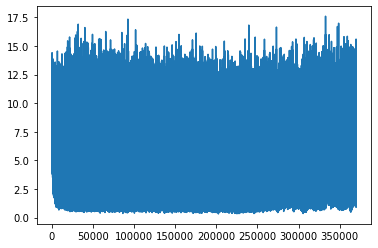

In [14]:
accuracy = calc_accuracy()
print("Accuracy:", accuracy)

import matplotlib.pyplot as plt
plt.plot(loss_arr)
plt.show()